<a href="https://colab.research.google.com/github/Dilshan1997/LSR-Research_code/blob/main/DataSet_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
data = pd.read_csv("clean_data.csv")
data = data.drop_duplicates()
data.to_csv("clean_data_final.csv")


Summary Statistics for Numerical Features:
       FRUITS_VEGGIES  DAILY_STRESS  PLACES_VISITED   CORE_CIRCLE  \
count    15489.000000  15489.000000    15489.000000  15489.000000   
mean         2.922461      2.792304        5.226096      5.513397   
std          1.443403      1.369373        3.315673      2.839107   
min          0.000000      0.000000        0.000000      0.000000   
25%          2.000000      2.000000        2.000000      3.000000   
50%          3.000000      3.000000        5.000000      5.000000   
75%          4.000000      4.000000        8.000000      8.000000   
max          5.000000      5.000000       10.000000     10.000000   

       SUPPORTING_OTHERS  SOCIAL_NETWORK   ACHIEVEMENT      DONATION  \
count       15489.000000    15489.000000  15489.000000  15489.000000   
mean            5.619214        6.489380      4.000129      2.716186   
std             3.244255        3.084892      2.760358      1.851407   
min             0.000000        0.000000      0

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv("clean_data_final.csv")

print("Summary Statistics for Numerical Features:")
print(data.describe())
print(data.isnull().sum())

# Check data types of each column
data_types = data.dtypes
print(data_types)

Summary Statistics for Numerical Features:
         Unnamed: 0  FRUITS_VEGGIES  DAILY_STRESS  PLACES_VISITED  \
count  15489.000000    15489.000000  15489.000000    15489.000000   
mean    8110.513849        2.922461      2.792304        5.226096   
std     4604.586692        1.443403      1.369373        3.315673   
min        0.000000        0.000000      0.000000        0.000000   
25%     4135.000000        2.000000      2.000000        2.000000   
50%     8208.000000        3.000000      3.000000        5.000000   
75%    12094.000000        4.000000      4.000000        8.000000   
max    15970.000000        5.000000      5.000000       10.000000   

        CORE_CIRCLE  SUPPORTING_OTHERS  SOCIAL_NETWORK   ACHIEVEMENT  \
count  15489.000000       15489.000000    15489.000000  15489.000000   
mean       5.513397           5.619214        6.489380      4.000129   
std        2.839107           3.244255        3.084892      2.760358   
min        0.000000           0.000000        0

In [ ]:
# !pip install pandas-profiling

import pandas as pd
from pandas_profiling import ProfileReport

# Create a ProfileReport
profile = ProfileReport(data)

# To display the report in the Colab notebook, use the following command:
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x78e58dfc8550> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
# plt.hist(data['IS_CURRENT_LIFE_STYLE_OKAY'], bins=20, color="red", width=0.5, edgecolor="green", lw=1)
plt.hist(data['IS_CURRENT_LIFE_STYLE_OKAY'], bins=2, color="red", lw=1)
plt.xlabel('IS_CURRENT_LIFE_STYLE_OKAY')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable')
plt.show()

In [ ]:
print(data['FRUITS_VEGGIES'])

plt.scatter(data['FRUITS_VEGGIES'],data['IS_CURRENT_LIFE_STYLE_OKAY'], c='red', marker="*", s=40, alpha=0.6)
plt.xlabel('FRUITS_VEGGIES')
plt.ylabel('IS_CURRENT_LIFE_STYLE_OKAY')
plt.show()

plt.plot(data['FRUITS_VEGGIES'],data['IS_CURRENT_LIFE_STYLE_OKAY'], c="g", lw=1, linestyle="--")
plt.show()

plt.hist(data['FRUITS_VEGGIES'],bins=[1,2,3,4,5], cumulative=True)
plt.show()

In [ ]:
# explodes = [0,0,0,0,2,0]
# plt.pie(data['FRUITS_VEGGIES'], labels=[1,2,3,4,5,],explode=explodes, autopct="%.2f%%", pctdistance=2, startangle=90)

# plt.boxplot(data['FRUITS_VEGGIES'])
# plt.show()

data_c = np.concatenate((data['FRUITS_VEGGIES'], data['DAILY_STRESS'], data['PLACES_VISITED'],data['ACHIEVEMENT'],data['CORE_CIRCLE'],data['SUPPORTING_OTHERS'],
                     data['SOCIAL_NETWORK']))

plt.boxplot(data_c )
plt.show()

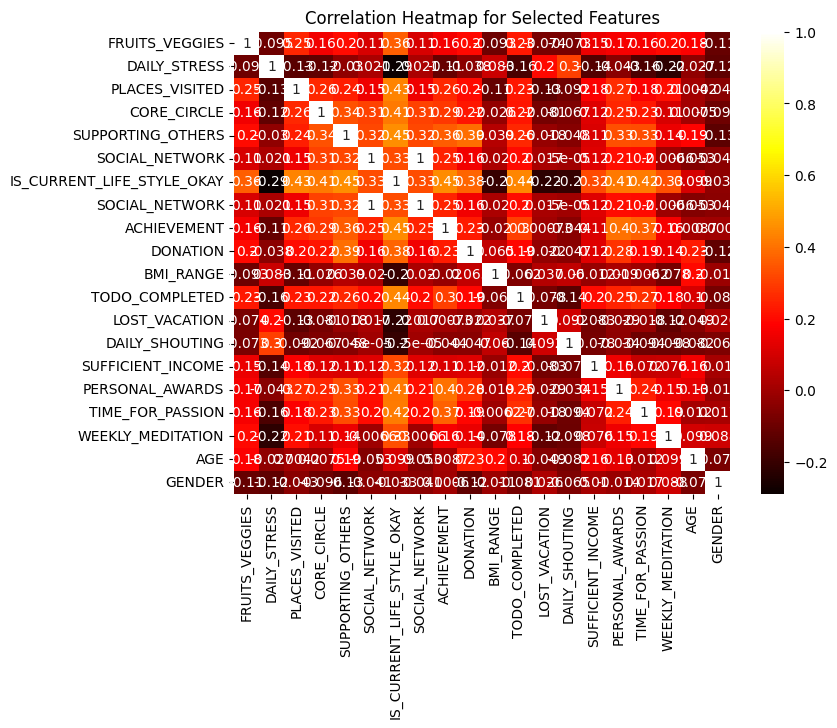

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

# Select specific features you want to include in the correlation heatmap
selected_features = ['FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED','CORE_CIRCLE','SUPPORTING_OTHERS',
                     'SOCIAL_NETWORK', 'IS_CURRENT_LIFE_STYLE_OKAY', 'SOCIAL_NETWORK','ACHIEVEMENT','DONATION','BMI_RANGE', 'TODO_COMPLETED', 'LOST_VACATION', 'DAILY_SHOUTING',
                     'SUFFICIENT_INCOME', 'PERSONAL_AWARDS', 'TIME_FOR_PASSION', 'WEEKLY_MEDITATION', 'AGE', 'GENDER']  # Replace with your feature names

# Create a subset of the dataset containing only the selected features
subset_data = data[selected_features]

# Calculate the correlation matrix for the subset
correlation_matrix = subset_data.corr()

# Create the correlation heatmap for the selected features
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='hot')
plt.title('Correlation Heatmap for Selected Features')
plt.show()

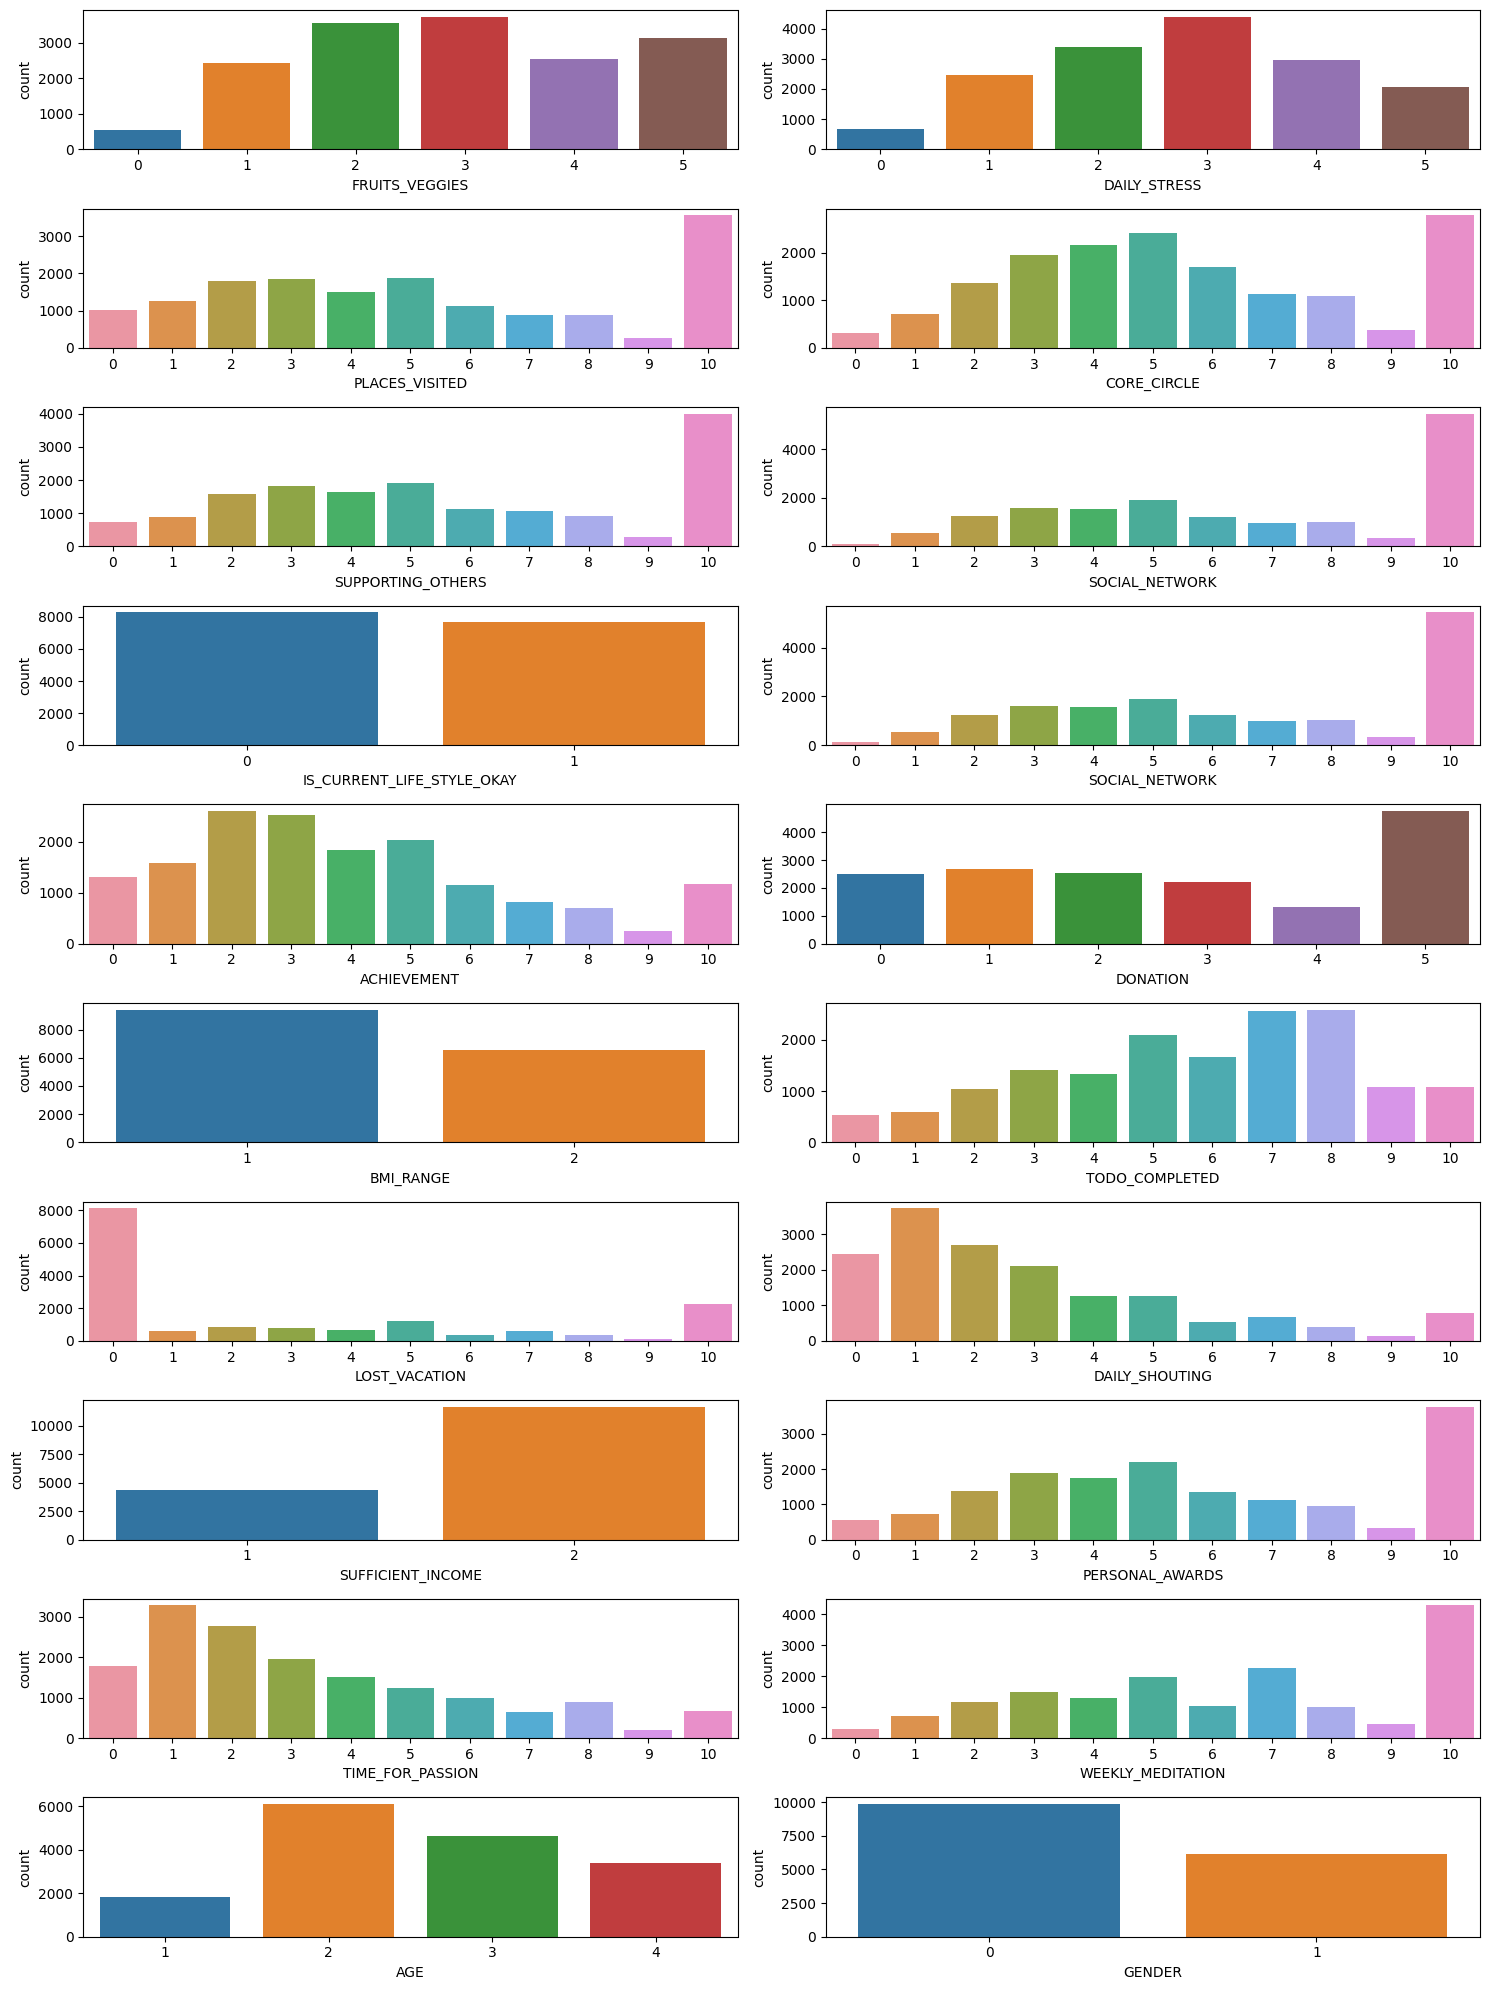

In [ ]:
# Create subplots
fig, axes = plt.subplots(nrows=len(selected_features) // 2, ncols=2, figsize=(15, 20))

# Plot countplots for each feature
for i, feature in enumerate(selected_features):
    row, col = i // 2, i % 2
    sns.countplot(data=data, x=feature, ax=axes[row, col])

plt.tight_layout()
plt.show()

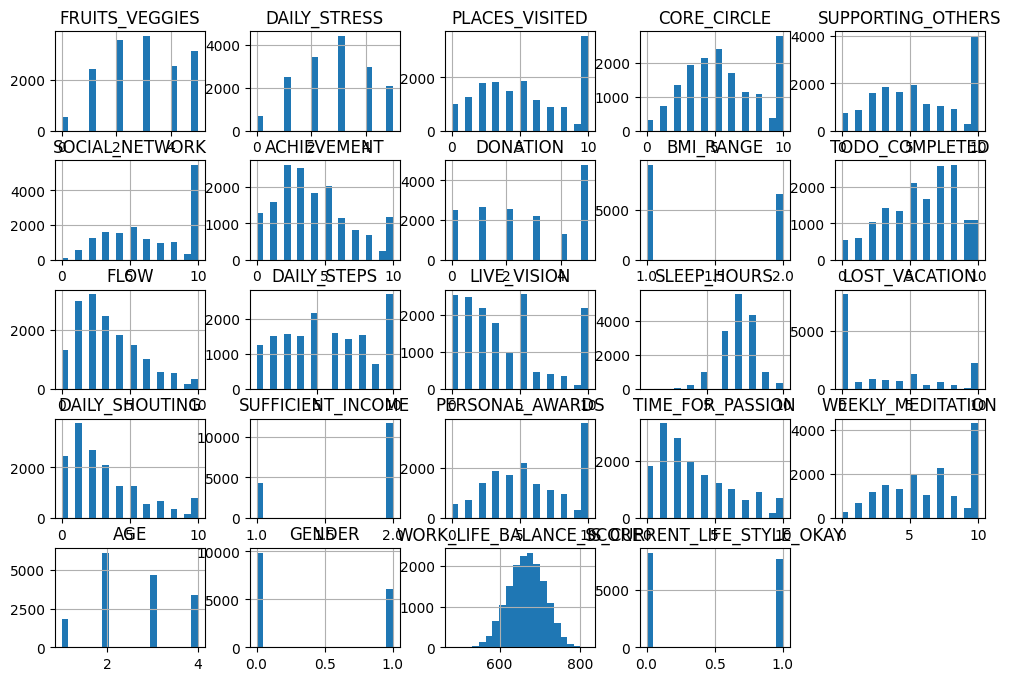

In [ ]:
data.hist(bins=20, figsize=(12, 8))
plt.show()

<ipython-input-18-74015e86b77b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


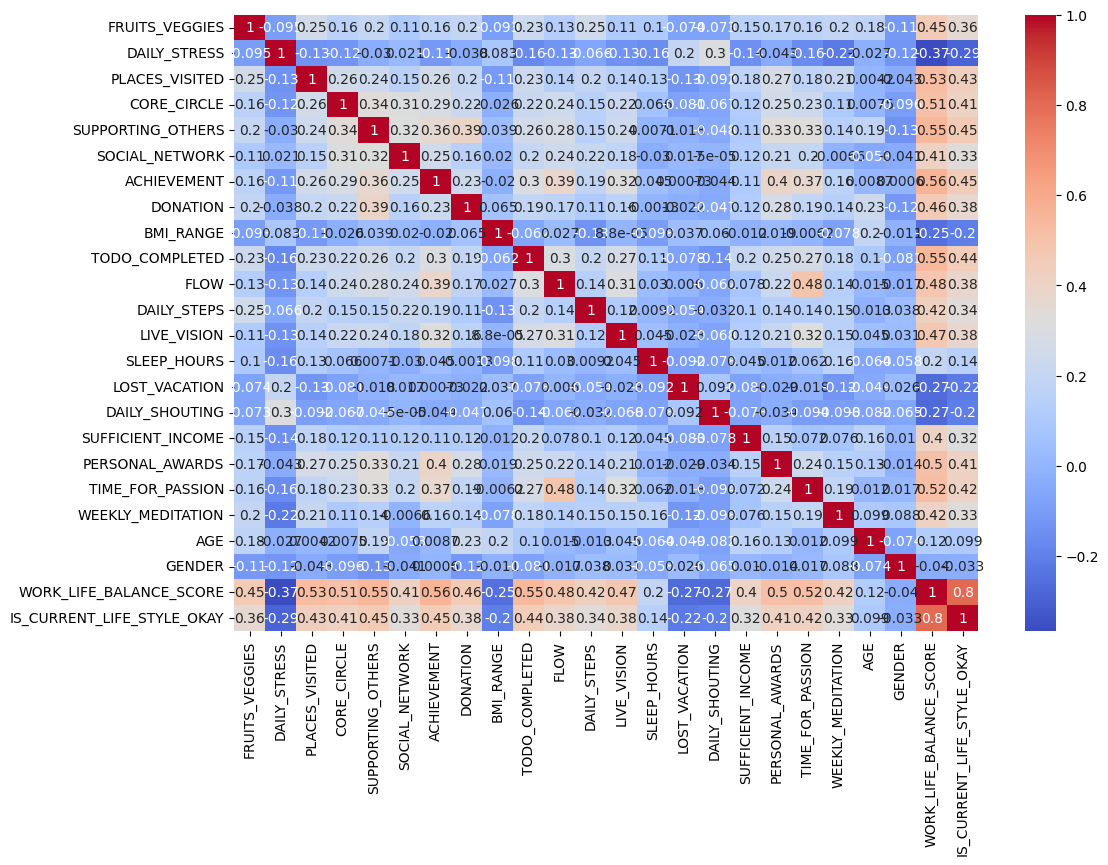

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()